In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [2]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False
    
# Add normalization, dropout, and pooling layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer

# Add batch normalization
x = BatchNormalization()(x)

# Add dropout layer
x = Dropout(0.5)(x)

# Add dense layers
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)

# Output layer
output_layer = Dense(units=7, activation='softmax')(x)

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=output_layer)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

train_data = train_datagen.flow_from_directory(directory= "C:/Users/sahad/Documents/Python/archive_smol/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 15900 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:/Users/sahad/Documents/Python/archive_smol/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 7178 images belonging to 7 classes.


In [12]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 20, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="MobileNet.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:

hist = model.fit(train_data,
                           epochs= 50,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

Epoch 1/50
497/497 [==============================] - ETA: 0s - loss: 1.5313 - accuracy: 0.4118
Epoch 1: val_accuracy improved from 0.42578 to 0.44141, saving model to MobileNet.h5
497/497 [==============================] - 113s 227ms/step - loss: 1.5313 - accuracy: 0.4118 - val_loss: 1.4160 - val_accuracy: 0.4414
Epoch 2/50
497/497 [==============================] - ETA: 0s - loss: 1.5195 - accuracy: 0.4161
Epoch 2: val_accuracy improved from 0.44141 to 0.50781, saving model to MobileNet.h5
497/497 [==============================] - 113s 226ms/step - loss: 1.5195 - accuracy: 0.4161 - val_loss: 1.2867 - val_accuracy: 0.5078
Epoch 3/50
497/497 [==============================] - ETA: 0s - loss: 1.5148 - accuracy: 0.4145
Epoch 3: val_accuracy did not improve from 0.50781
497/497 [==============================] - 116s 233ms/step - loss: 1.5148 - accuracy: 0.4145 - val_loss: 1.4087 - val_accuracy: 0.4492
Epoch 4/50
497/497 [==============================] - ETA: 0s - loss: 1.5138 - accurac

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")


In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

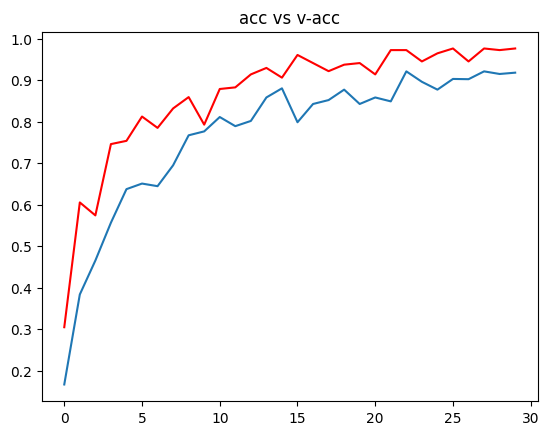

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

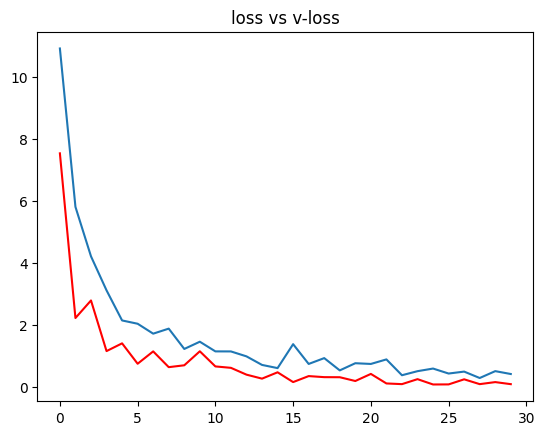

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 19ms/step
 the image is of Disguist


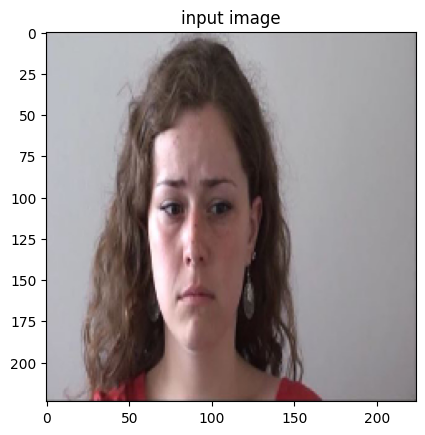

In [ ]:
# path for the image to see if it predics correct class

path = "/content/images_large_10.1177_1474704917700418-fig5.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()